# Bank Marketing Data Set

### By: Aesha Aljohani

### Import libraries

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# Models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Evaluation
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
plt.style.use("ggplot")
#3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
#4
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [17]:
#Load Data 
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
#print concise summery of the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
sum(df.duplicated())

12

In [24]:
# This gives the statistics about "categorical columns"
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [25]:
df.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [26]:
# Checking the values of the output col
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [27]:
# Checking the ages of the clients
df.groupby('age').size()

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Length: 78, dtype: int64

Text(0, 0.5, 'Number of clients')

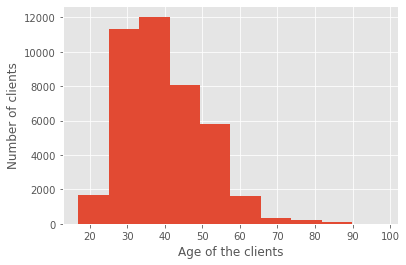

In [29]:
# Creating a histogram for the ages
plt.hist(df['age'])
plt.xlabel('Age of the clients')
plt.ylabel('Number of clients')

In [30]:
# Splitting the data to an X array (input independent variables) and y list (output - dependent variable).
X = df.iloc[:, :-1].values # It will be overwritten later for some column transformation reasons
y = df.iloc[:, -1].values

In [31]:
print(X[0:2], y[0:2], sep='\n\n\n')

[[56 'housemaid' 'married' 'basic.4y' 'no' 'no' 'no' 'telephone' 'may'
  'mon' 261 1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]
 [57 'services' 'married' 'high.school' 'unknown' 'no' 'no' 'telephone'
  'may' 'mon' 149 1 999 0 'nonexistent' 1.1 93.994 -36.4 4.857 5191.0]]


['no' 'no']


In [32]:
# Encoding y to bin values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [33]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ct = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(),
    make_column_selector(dtype_include=object)))
    
X = np.array(ct.fit_transform(df.iloc[:, :-1]))

In [34]:
X[1][:]

array([ 1.62899323, -0.42150051, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ])

### Splitting Data to Training and Test Sets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [36]:
X_test, y_test

(array([[-0.76998036, -0.55649175, -0.56592197, ...,  0.        ,
          1.        ,  0.        ],
        [-0.67402142, -0.59891756, -0.20490853, ...,  0.        ,
          1.        ,  0.        ],
        [-1.44169297, -0.12066292,  0.87813182, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [-0.76998036, -0.71848122, -0.56592197, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.57344485,  0.30745213, -0.20490853, ...,  0.        ,
          1.        ,  0.        ],
        [-0.96189825,  1.61108173, -0.56592197, ...,  0.        ,
          1.        ,  0.        ]]),
 array([0, 0, 1, ..., 0, 0, 1]))

In [37]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1,solver='liblinear')
classifier.fit(X_train, y_train)

print(classifier)

LogisticRegression(random_state=1, solver='liblinear')


In [39]:
y_pred = classifier.predict(X_test)
# np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print('\n')

tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
print('tn fp fn tp')
print(tn, fp, fn, tp)
print('\n')
print("The accuracy of the logistic regression classification model is {0} %".format(round(acc_score*100,2)))

[[7084  210]
 [ 530  414]]


tn fp fn tp
7084 210 530 414


The accuracy of the logistic regression classification model is 91.02 %


In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [42]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print('\n')

tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
print('tn fp fn tp')
print(tn, fp, fn, tp)
print('\n')
print("The accuracy of the kNN classification model is {0} %".format(round(acc_score*100,2)))

[[7153  141]
 [ 645  299]]


tn fp fn tp
7153 141 645 299


The accuracy of the kNN classification model is 90.46 %


In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [45]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print('\n')

tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
print('tn fp fn tp')
print(tn, fp, fn, tp)
print('\n')
print("The accuracy of the decision tree classification model is {0} %".format(round(acc_score*100,2)))

[[6830  464]
 [ 432  512]]


tn fp fn tp
6830 464 432 512


The accuracy of the decision tree classification model is 89.12 %


In [47]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=1)
classifier.fit(X_train, y_train)

SVC(random_state=1)

In [48]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print('\n')

tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
print('tn fp fn tp')
print(tn, fp, fn, tp)
print('\n')
print("The accuracy of the SVM classification model is {0} %".format(round(acc_score*100,2)))

[[7093  201]
 [ 537  407]]


tn fp fn tp
7093 201 537 407


The accuracy of the SVM classification model is 91.04 %


In [50]:
# Predicting the value of y for the first row of the dataset
df.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [51]:
# The output for the first row of the dataset must be 'no', which is - after the transformation to binary - equals to 0
y[0]

0

In [52]:
# The inputs for the first row of the dataset after encoding and scaling:
X[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ])

In [54]:
# Let's predict the output for this row with the final SVM classifier
print(classifier.predict(X[0].reshape(-1, 63)))

[0]


## thank you